**Imports**

In [1]:
import pydataset
import matplotlib.pyplot as plt
import pyplotterlib.standard.plotters as ppl

**1) Process the data**

In [2]:
DF = pydataset.data(item="Crime")
DF["crmPr100"] = DF["crmrte"]*100
DF["year"] = DF["year"] + 1900

#
df87 = DF.loc[DF["year"]==1987]
df87.sort_values("crmrte",inplace=True)
_topThreeCounties = df87.tail(3)["county"].to_list()
_botThreeCounties = df87.head(3)["county"].to_list()

#
_topThreePlotData = [ DF.loc[DF["county"]==currCounty][["year","crmPr100"]].to_numpy() for currCounty
                     in _topThreeCounties ]
_botThreePlotData = [ DF.loc[DF["county"]==currCounty][["year","crmPr100"]].to_numpy() for currCounty
                     in _botThreeCounties ]

plotData = _topThreePlotData + _botThreePlotData

/tmp/ipykernel_12553/225227595.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df87.sort_values("crmrte",inplace=True)


**2) Create a simple line plotter - this covers MOST of the options we need**

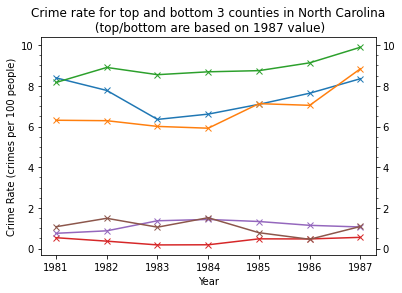

In [3]:
currKwargs = {"dataLabels": _topThreeCounties + _botThreeCounties,
              "lineMarkerStyles":'x',
              "plotData":plotData,
              "showLegend":False,
              "showMinorTickMarkersY":True,
              "showTicksAndLabelsOnSides.right":True,
              "titleStr":"Crime rate for top and bottom 3 counties in North Carolina\n (top/bottom are based on 1987 value)",
              "xLabelStr": "Year",
              "yLabelStr": "Crime Rate (crimes per 100 people)"
             }

linePlotter = ppl.LinePlotter(**currKwargs)
unused = linePlotter.createPlot()
plt.savefig("splitAxPlotterA_imgA")

**3) Use this as a template to create a plot with the y-axis split**

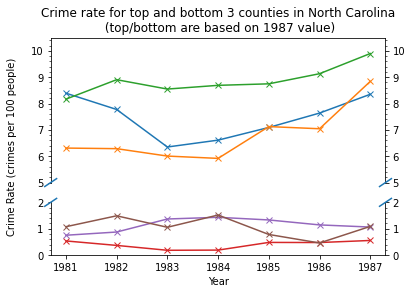

In [4]:
currKwargs = {"plotter":linePlotter,
              "yLimits":[[0.00,2],[5,10.5]]}

splitAxPlotter = ppl.SplitAxisPlotterCreator(**currKwargs)
unused = splitAxPlotter.createPlot()
plt.savefig("splitAxPlotterA_imgB")

**4) Demonstrate that we CAN further split both axes if we wanted to**

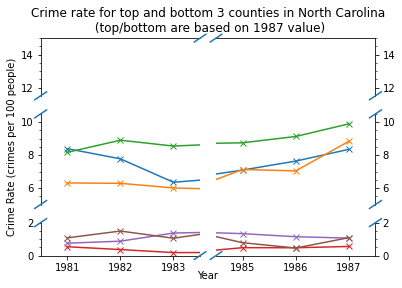

In [5]:
unused = splitAxPlotter.createPlot(xLimits = [[1980.5,1983.5], [1984.5,1987.5] ],
                                        yLimits = [[0.00,2],[5,10.5], [11.5,15]],
                                        xSpacingFract = 0.05,
                                   xLabelOffset=-0.07,
                                  yLabelOffset = -0.07)
plt.savefig("splitAxPlotterA_imgC")

**5) Demonstrate that we can have greater control by using a lower-level object**

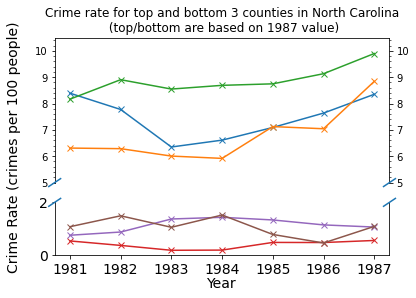

In [6]:
lowerLevelPlotter = splitAxPlotter.createPlotter()

lowerLevelPlotter.opts.plotterGrid.value[0][0].opts.showMinorTickMarkersY.value = False
lowerLevelPlotter.opts.plotterGrid.value[0][0].opts.showTicksAndLabelsOnSides.value.right = False
lowerLevelPlotter.opts.plotterGrid.value[0][0].opts.fontSizeDefault.value = 14

unused = lowerLevelPlotter.createPlot()
plt.savefig("splitAxPlotterA_imgD")